In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv('data-export.csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


As you can see from the start, there are several errors on the dataset such as the headers involved. The data is supposed to start from the second row. Let's make the changes.

In [3]:
#selecting the first  row from the header
new_header = df.iloc[0]
# I will then take the data less the header row
df = df[1:]
# then i will set the header row as the df header
df.columns = new_header
df.reset_index(drop = True, inplace = True)
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


The dataset is well corrected now.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

the date time column plus othe columns need to be converted to an appropriate data type

In [10]:
# Date + hour (YYYMMDDHH)
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'],
                                               format = '%Y%m%d%H')
# Users
df['Users'] = pd.to_numeric(df['Users'])

# sessions
df['Sessions'] = pd.to_numeric(df['Sessions'])

# I will now group the data by date and sum up the users and sessions
df_grouped = df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({'Users':'sum',
                                                           'Sessions':'sum'})

df_grouped.head()

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102


The overall purpose of the above operation is to prepare and summarize the dataset for time series analysis, focusing on how user engagement (through sessions) varies by time. By converting data into appropriate types and grouping it by time, you can more easily perform operations like plotting time series graphs, calculating moving averages, or applying time series forecasting models.

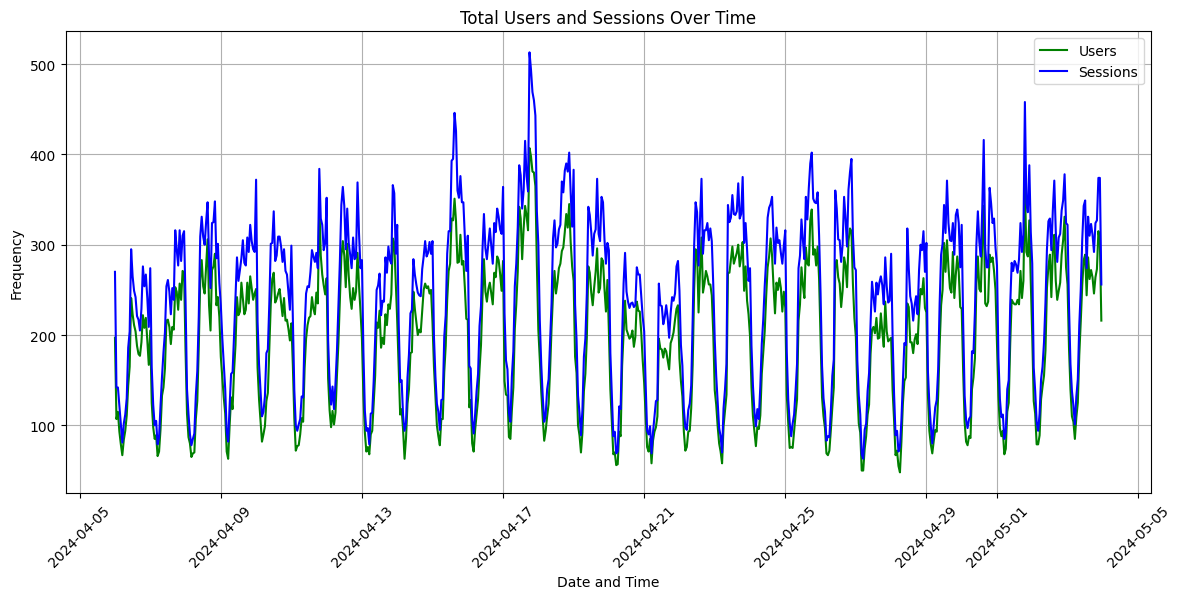

In [14]:
# a line chart to show the total users and sessions over time
plt.figure(figsize = (14,6))
plt.plot(df_grouped.index, df_grouped['Users'], label='Users',color='green')
plt.plot(df_grouped.index, df_grouped['Sessions'], label='Sessions',color='blue')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Time')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

Now that we’ve analyzed the session trends, let’s move on to User Engagement Analysis. I will look into metrics like average engagement time per session, engagement rate, and events per session to evaluate how engaged users are when they visit the site:

In [15]:
df.columns

Index(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object', name=0)

In [16]:
# I will begin by converting the relevant columns to numerics
df['Average engagement time per session'] = pd.to_numeric(df['Average engagement time per session'])
df['Engaged sessions'] = pd.to_numeric(df['Engaged sessions'])
df['Engagement rate'] = pd.to_numeric(df['Engagement rate'])
df['Engaged sessions per user'] = pd.to_numeric(df['Engaged sessions per user'])
df['Events per session'] = pd.to_numeric(df['Events per session'])

# I will then gorupby date + hour then calculate the mean of the engagement metrics
engagement_metrics = df.groupby(df['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session' : 'mean',
    'Engaged sessions' : 'mean',
    'Engagement rate' : 'mean',
    'Engaged sessions per user' : 'mean',
    'Events per session' : 'mean'
})

engagement_metrics.head()

,Average engagement time per session,Engaged sessions,Engagement rate,Engaged sessions per user,Events per session
Date + hour (YYYYMMDDHH),,,,,
2024-04-06 00:00:00,55.070258,29.20,0.450262,0.607673,3.610049
2024-04-06 01:00:00,49.115957,17.25,0.489905,0.644213,4.719012
2024-04-06 02:00:00,66.270536,21.00,0.595759,0.736716,5.372024
2024-04-06 03:00:00,52.273710,12.80,0.446725,0.568105,4.691984
2024-04-06 04:00:00,67.222410,11.75,0.494964,0.603943,4.686724


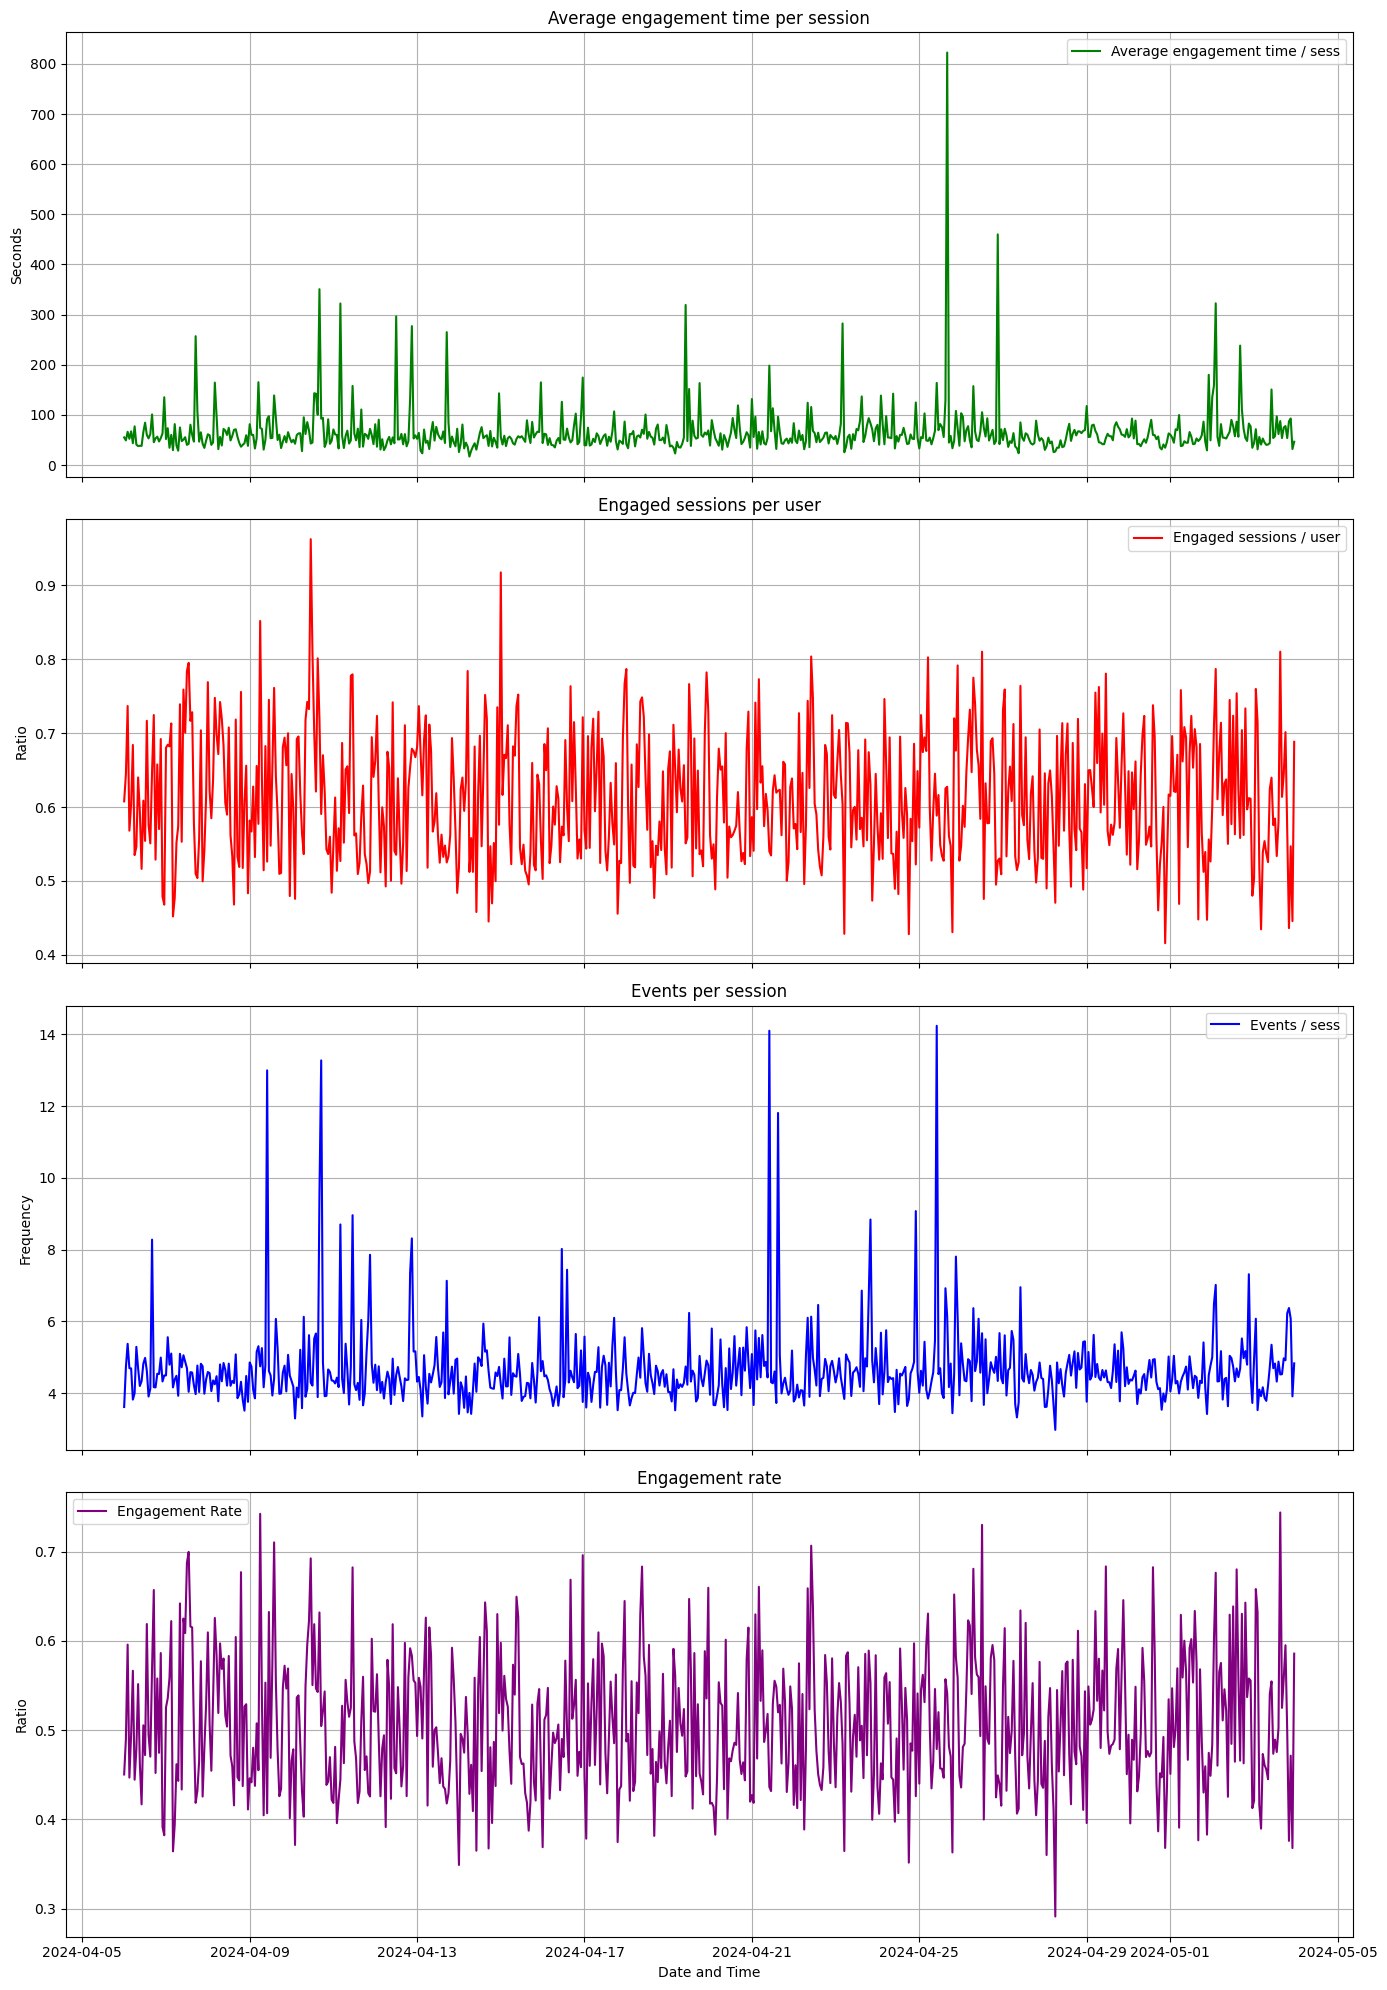

In [18]:
# plotting the engagement metrics
fig, ax = plt.subplots(4, 1, figsize = (14,20), sharex = True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'],
           label = 'Average engagement time / sess', color = 'green')
ax[0].set_title('Average engagement time per session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'],
           label = 'Engaged sessions / user', color = 'red')
ax[1].set_title('Engaged sessions per user')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'],
           label = 'Events / sess', color = 'blue')
ax[2].set_title('Events per session')
ax[2].set_ylabel('Frequency')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'],
           label = 'Engagement Rate', color = 'purple')
ax[3].set_title('Engagement rate')
ax[3].set_ylabel('Ratio')
ax[3].set_xlabel('Date and Time')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

The user engagement analysis provides insights into how visitors interact with the website:

1. **Average Engagement Time per Session**: The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.
2. **Engaged Sessions per User**: This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.
3. **Events per Session**: The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.
4. **Engagement Rate**: The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.




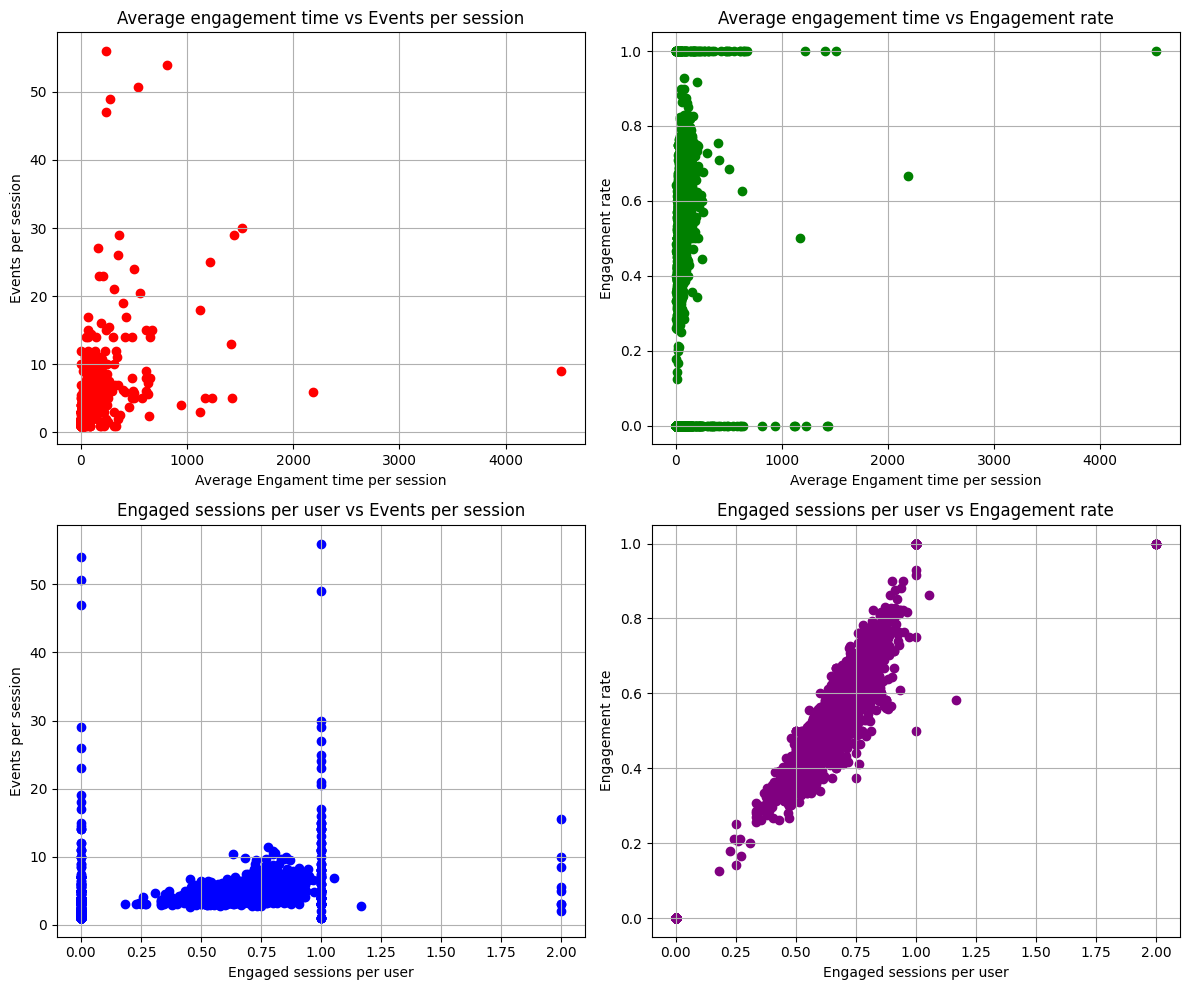

In [19]:
# Investigating the correlation between them
fig, ax = plt.subplots(2,2, figsize = (12, 10))

# average engagement time vs events per session
ax[0,0].scatter(df['Average engagement time per session'], df['Events per session'],
              color = 'red')
ax[0,0].set_title('Average engagement time vs Events per session')
ax[0,0].set_xlabel('Average Engament time per session')
ax[0,0].set_ylabel('Events per session')
ax[0,0].grid(True)

# average engagement time vs engagement rate
ax[0,1].scatter(df['Average engagement time per session'], df['Engagement rate'],
                color = 'green')
ax[0,1].set_title('Average engagement time vs Engagement rate')
ax[0,1].set_xlabel('Average Engament time per session')
ax[0,1].set_ylabel('Engagement rate')
ax[0,1].grid(True)

# Engaged sessions per user vs events per session
ax[1,0].scatter(df['Engaged sessions per user'], df['Events per session'],
                color = 'blue')
ax[1,0].set_title('Engaged sessions per user vs Events per session')
ax[1,0].set_xlabel('Engaged sessions per user')
ax[1,0].set_ylabel('Events per session')
ax[1,0].grid(True)

# Engaged session per user vs engagement rate
ax[1,1].scatter(df['Engaged sessions per user'], df['Engagement rate'],
                color = 'purple')
ax[1,1].set_title('Engaged sessions per user vs Engagement rate')
ax[1,1].set_xlabel('Engaged sessions per user')
ax[1,1].set_ylabel('Engagement rate')
ax[1,1].grid(True)

plt.tight_layout()
plt.show()

Here’s what we can analyze from the above scatter plots:

1. **Average Engagement Time vs Events per Session**: There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.
2. **Average Engagement Time vs Engagement Rate**: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.
3. **Engaged Sessions per User vs Events per Session**: Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.
4. **Engaged Sessions per User vs Engagement Rate**: There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.

I will now proceed with the Channel Performance Analysis to assess how different marketing channels contribute to traffic and engagement. It will involve analyzing the session, user, and engagement data segmented by the marketing channel:

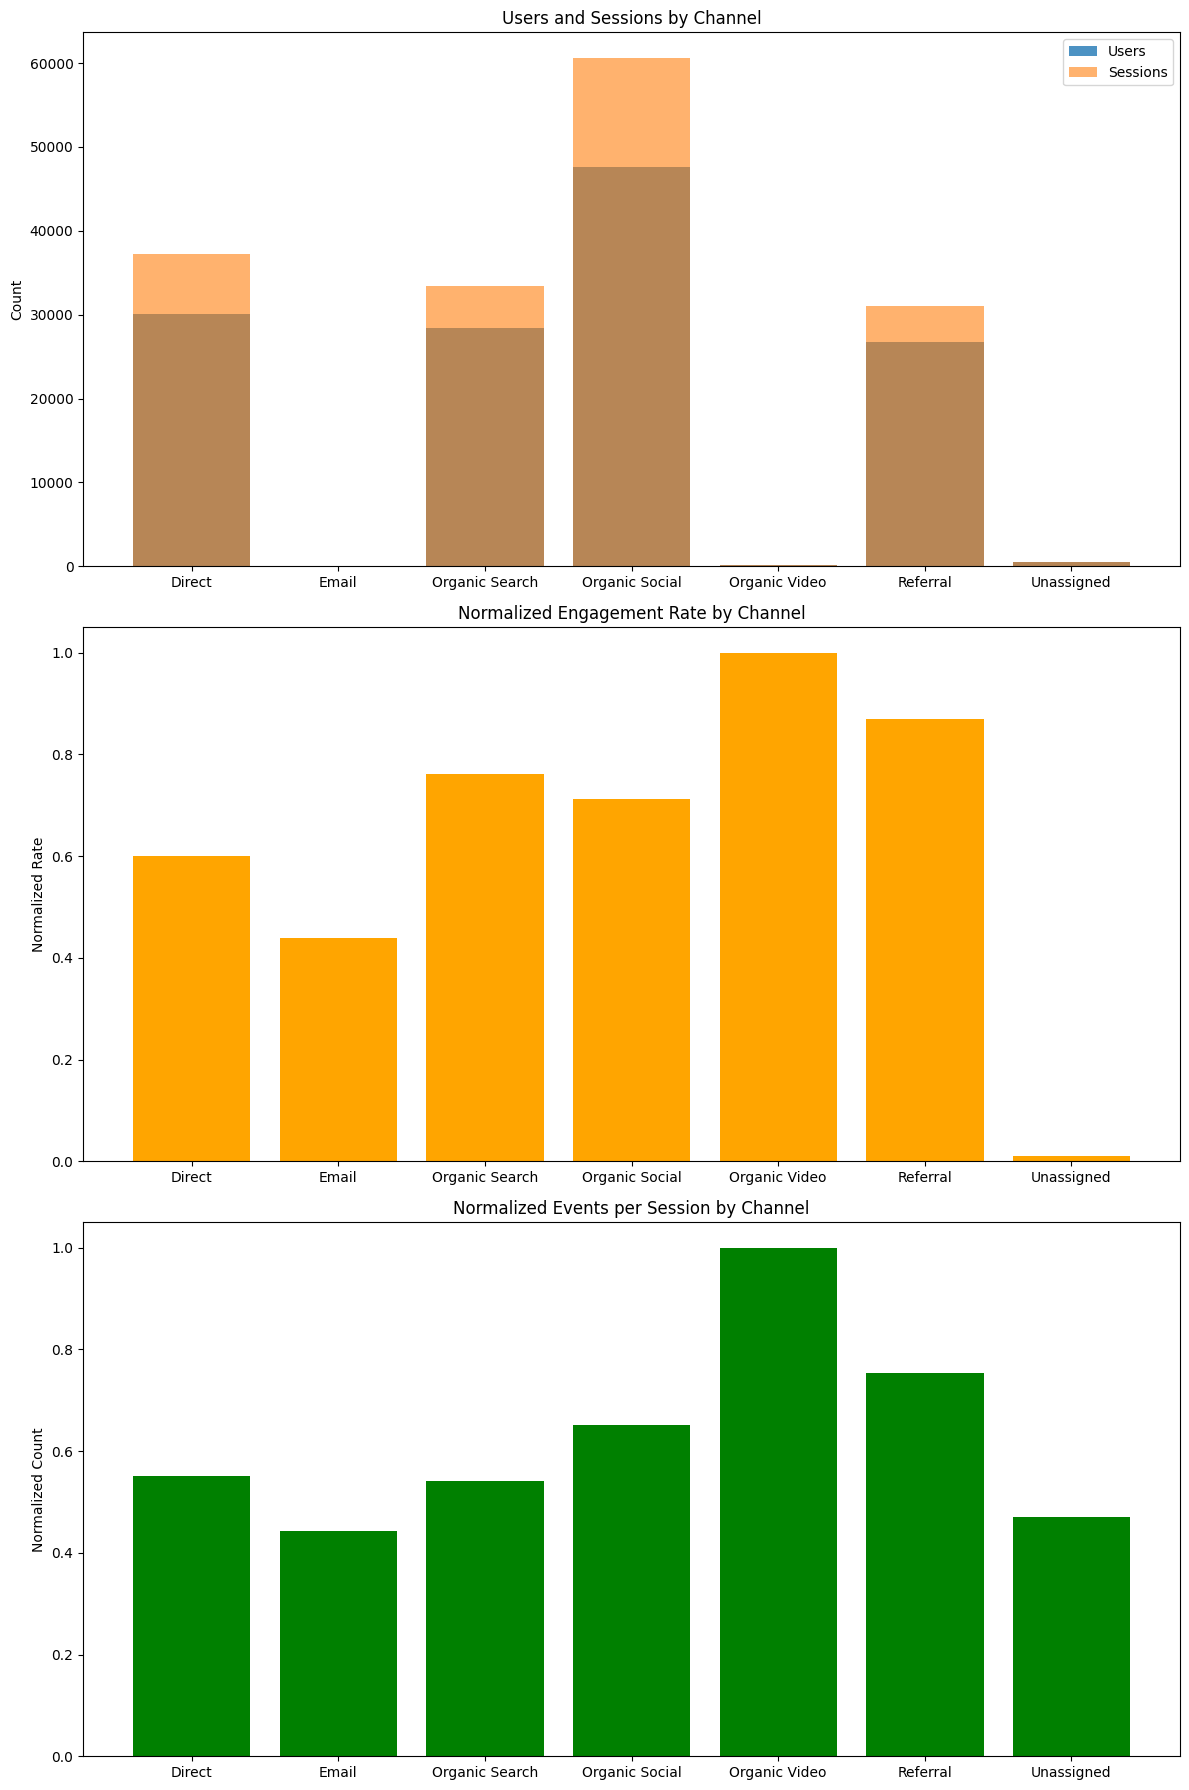

In [29]:
# group data by channel and aggregate necessary metrics
channel_performance = df.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

The data illustrates significant variations in performance across different channels, highlighting the strengths and weaknesses of each in driving traffic, engaging users, and encouraging interactions. The high performance of ‘Organic Search’ in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity over quality of visits. In contrast, ‘Referral’ and ‘Organic Video’ channels, while not leading in volume, excel in engaging users deeply, pointing to potential areas for leveraging these strengths in marketing strategies

# **Forecasting Website Traffic**
Now, let’s see how we can forecast the website traffic for the next 24 hours. It will involve creating a time series model to forecast future values based on the observed session data. Let’s start this by plotting the autocorrelation and partial autocorrelation plots of our time series data, which is typically done to help identify the order of an autoregressive integrated moving average for time series models for forecasting:

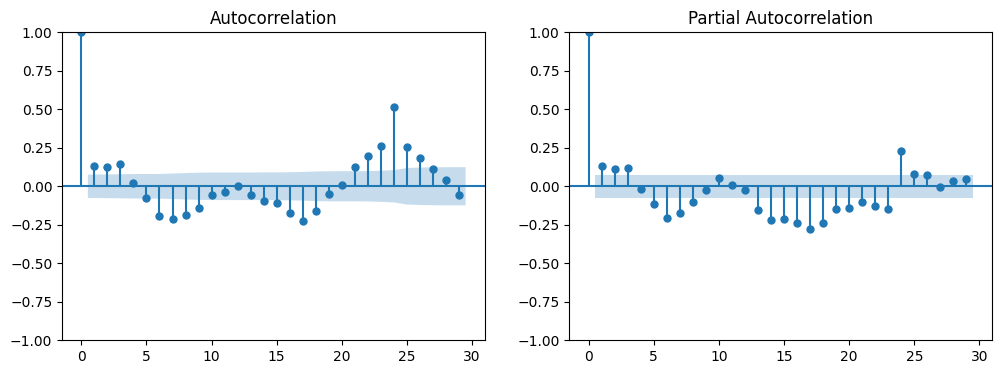

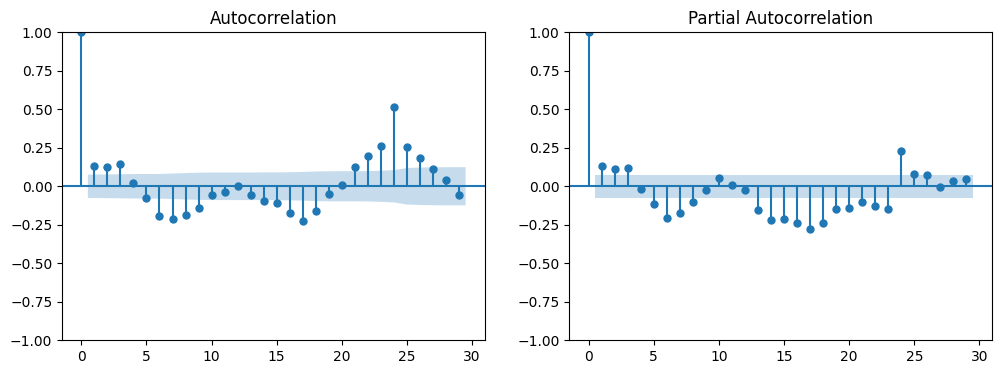

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = df_grouped['Sessions'].asfreq('H').fillna(method = 'ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

#plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])

Here’s how to interpret the above graph:

1. **PACF (Partial Autocorrelation Function)**: This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.
2. **ACF (Autocorrelation Function)**: This plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered.

The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the value of d as 1. Now, here’s how we can forecast the website’s traffic for the next 24 hours using the SARIMA model:

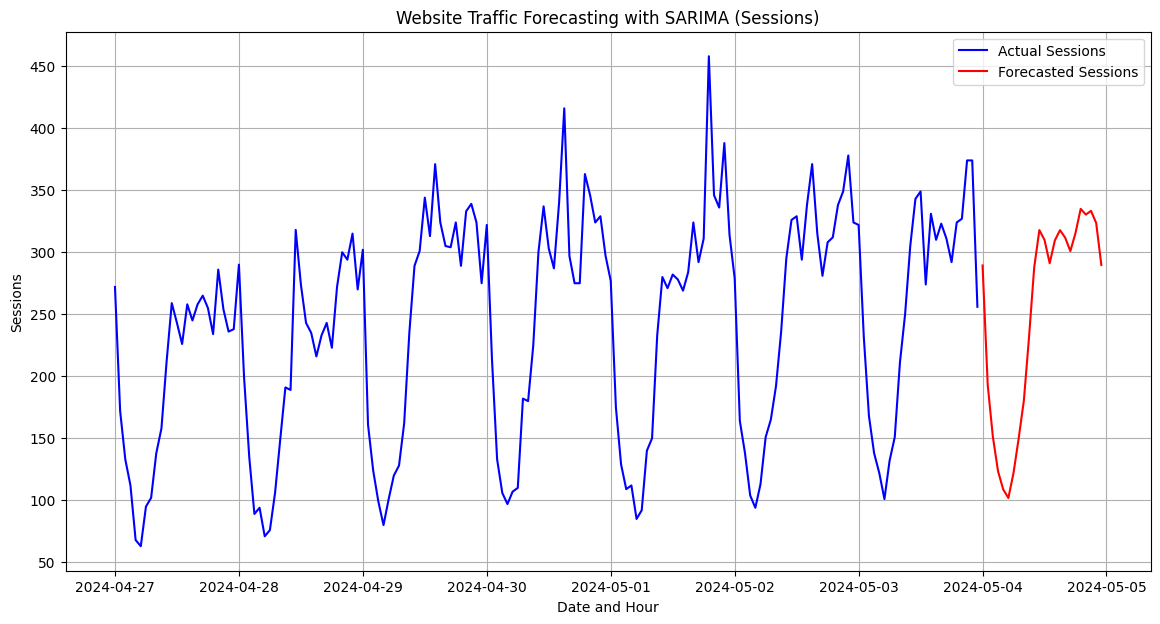

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = df_grouped['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:],
         label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:],
         sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()